In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
np.random.seed(42)

In [3]:
coffee_full = pd.read_csv('data/coffee_dataset.csv')

In [4]:
coffee_red = coffee_full.sample(200) 

In [5]:
#bootsampling
bootsample = coffee_red.sample(200, replace=True)

In [10]:
#
mean_coff = bootsample[bootsample['drinks_coffee']==True]['height'].mean()
mean_nocoff = bootsample[bootsample['drinks_coffee']==False]['height'].mean()

In [12]:
mean_coff - mean_nocoff

2.244578194251602

In [15]:
diff = []
for i in range(10000):
    bootsample = coffee_red.sample(200, replace=True)
    mean_coff = bootsample[bootsample['drinks_coffee']==True]['height'].mean()
    mean_nocoff = bootsample[bootsample['drinks_coffee']==False]['height'].mean()
    diff.append(mean_coff - mean_nocoff)

In [16]:
diff = pd.DataFrame(diff)

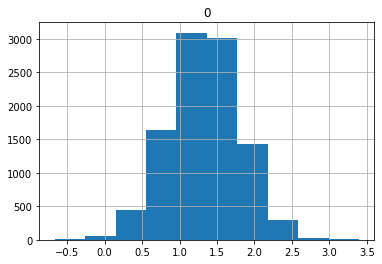

In [18]:
diff.hist();

In [21]:
np.percentile(diff, 2.5) , np.percentile(diff, 97.5)

(0.40101764530069206, 2.2387899856723634)

In [23]:
coffee_full.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [26]:
coffee_full.dtypes

user_id            int64
age               object
drinks_coffee       bool
height           float64
dtype: object

In [28]:
#age
#
mean_older21 = bootsample[bootsample['age'] == '>=21']['height'].mean()
mean_younger21 = bootsample[bootsample['age'] == '<21']['height'].mean()
diff_age = mean_older21 - mean_younger21 

In [29]:
diff_ages =[]
for i in range(10000):
    bootsample = coffee_red.sample(200, replace=True)
    mean_older21 = bootsample[bootsample['age'] == '>=21']['height'].mean()
    mean_younger21 = bootsample[bootsample['age'] == '<21']['height'].mean()
    diff_ages.append(mean_older21 -mean_younger21)

In [31]:
diff_ages = pd.DataFrame(diff_ages)

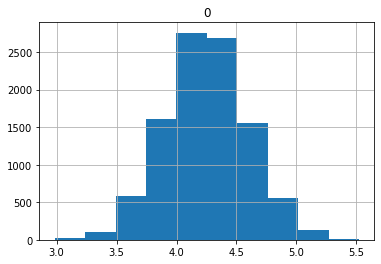

In [33]:
diff_ages.hist();

In [34]:
np.percentile(diff_ages, 0.5),np.percentile(diff_ages, 99.5),

(3.3656594701347764, 5.12256167148593)